In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Potato\\Train",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 5702 files belonging to 3 classes.


In [4]:
class_names = train_ds.class_names
class_names

['Early Blight', 'Healthy', 'Late Blight']

In [5]:
for image_batch, labels_batch in train_ds.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[1 2 1 1 2 2 0 2 0 2 2 1 2 0 2 0 0 1 2 0 0 0 2 1 1 2 0 0 2 0 2 0]


IMAGE VISUALIZATION


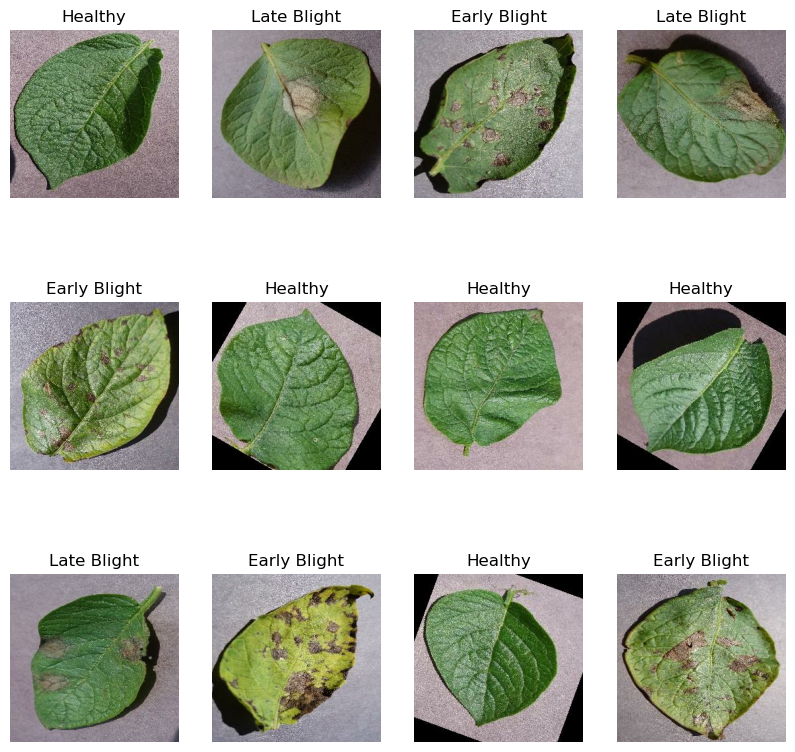

In [6]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in train_ds.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [7]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Potato\\Test",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 144 files belonging to 3 classes.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Potato\\Val",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 1282 files belonging to 3 classes.


CACHING AND SHUFFLING DATA FOR BETTER TRAINING

These operations are used to optimize the input pipeline for training a machine learning model:

cache(): Stores data in memory after the first read to speed up access in later epochs.

shuffle(): Randomizes the order of training data to prevent the model from learning patterns based on data order.

prefetch(): Preloads data while the model is training to improve performance and reduce training time.

DATA AUGMENTATION AND RESIZING

In [9]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

MODEL BUILDING (CNN)

In [10]:
input_shape = (256, 256, 3)
n_classes = 3

model = models.Sequential([
    layers.Input(shape=input_shape),              # ✅ Define input here
    data_augmentation,                            # ✅ Augmentation after Input
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])


In [11]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [14]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 168s 932ms/step - accuracy: 0.8985 - loss: 0.2722 - val_accuracy: 0.9501 - val_loss: 0.1502
Epoch 2/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 162s 903ms/step - accuracy: 0.9394 - loss: 0.1556 - val_accuracy: 0.9485 - val_loss: 0.1672
Epoch 3/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 164s 915ms/step - accuracy: 0.9300 - loss: 0.1930 - val_accuracy: 0.9243 - val_loss: 0.1717
Epoch 4/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 165s 920ms/step - accuracy: 0.9591 - loss: 0.1104 - val_accuracy: 0.9711 - val_loss: 0.0878
Epoch 5/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 165s 920ms/step - accuracy: 0.9740 - loss: 0.0714 - val_accuracy: 0.9758 - val_loss: 0.0643
Epoch 6/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 174s 972ms/step - accuracy: 0.9779 - loss: 0.0574 - val_accuracy: 0.9899 - val_loss: 0.0261
Epoch 7/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 162s 906ms/step - accuracy: 0.9747 - loss: 0.0781 - val_accuracy: 0.9774 - val_loss: 0.0635
Epoch 8/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 168s 940ms/step - accuracy: 0.9843 -

In [16]:
scores = model.evaluate(test_ds)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step - accuracy: 0.9868 - loss: 0.0568


In [17]:
scores

[0.03445875644683838, 0.9930555820465088]

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

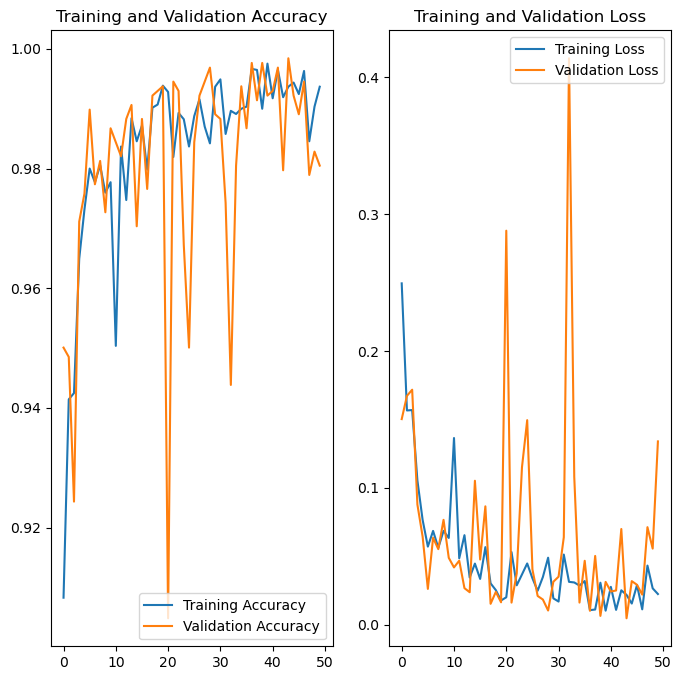

In [19]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [20]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

first image to predict
actual label: Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 845ms/step
predicted label: Healthy


In [21]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [22]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [28]:
import os

# Base directory to save all models
base_dir = r"C:\Users\krith\OneDrive\Desktop\Krith demos_and_projects\potato disease\models"

# Create folder if not exists
os.makedirs(base_dir, exist_ok=True)

# Get current version numbers (only for .h5 files)
existing_versions = [
    int(f.split(".")[0]) for f in os.listdir(base_dir)
    if f.endswith(".h5") and f.split(".")[0].isdigit()
]

# Compute next version number
next_version = max(existing_versions, default=0) + 1

# Save model as versioned .h5 file
model.save(os.path.join(base_dir, f"model {next_version}.keras"))


print(f"Model saved as version {next_version}.h5 ")


Model saved as version 1.h5 
